In [1]:
import numpy as np
import sys
sys.path.append(
    '/global/u1/s/sfschen/Python/velocileptors/')

from matplotlib import pyplot as plt
from compute_xiell_tables import compute_xiell_tables, compute_xiells_fixedbias

140.86304574397874 1559.5187133701488


In [5]:
rr = np.arange(50, 160, 0.1)

In [6]:
# Remake the data grid:
order = 4
Npoints = 2*order + 1
# these are OmegaM, h, sigma8
x0s = [0.31, 0.68, 0.73]; Nparams = len(x0s) # these are chosen to be roughly at the BOSS best fit value
dxs = [0.01, 0.01, 0.05]

output_shape = (len(rr),6)

center_ii = (order,)*Nparams
X0grid = np.zeros( (Npoints,)*Nparams+ output_shape)
X2grid = np.zeros( (Npoints,)*Nparams+ output_shape)

In [7]:
# Load data
for ii in range(Npoints):
    for jj in range(Npoints):
        for kk in range(Npoints):
            #print(ii,jj,kk)
            X0grid[ii,jj,kk] = np.loadtxt('data/boss_z_0.61/boss_xi0_%d_%d_%d.txt'%(ii,jj,kk))
            X2grid[ii,jj,kk] = np.loadtxt('data/boss_z_0.61/boss_xi2_%d_%d_%d.txt'%(ii,jj,kk))

In [8]:
# Now compute the derivatives
from taylor_approximation import compute_derivatives

derivs0 = compute_derivatives(X0grid, dxs, center_ii, 4)
derivs2 = compute_derivatives(X2grid, dxs, center_ii, 4)

In [12]:
from taylor_approximation import taylor_approximate
import time
test_point = [0.32, 0.64, 0.6]
t1 =time.time()
xi0test = taylor_approximate(test_point, x0s, derivs0, order=3)
xi2test = taylor_approximate(test_point, x0s, derivs2, order=3)
t2 =time.time()
print(t2-t1)

0.006761074066162109


In [15]:
xi0, xi2 = compute_xiell_tables(test_point)

119 176
119 176


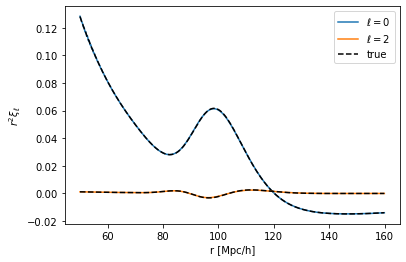

In [16]:
ii = 0

plt.plot(rr, rr * xi0test[:,ii], label=r'$\ell=0$')
plt.plot(rr, rr * xi0[:,ii], 'k--')

plt.plot(rr, rr * xi2test[:,ii], label=r'$\ell=2$')
plt.plot(rr, rr * xi2[:,ii], 'k--', label='true')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$r^2 \xi_\ell$')
plt.legend()

In [15]:
# Let's test something...
from scipy.interpolate import interp1d
test_point = [0.32, 0.64, 0.6]
xi0test, xi2test =compute_xiells_fixedbias(test_point, 2,1, dr=1.0)
xi0, xi2 = compute_xiells_fixedbias(test_point, 2,1, dr=0.1)

rr1 = np.arange(50,160,0.1)
rr2 = np.arange(50,160,1.0)

xi0test = interp1d(rr2,xi0test,kind='cubic',fill_value='extrapolate')(rr1)
xi2test = interp1d(rr2,xi2test,kind='cubic',fill_value='extrapolate')(rr1)

119 176
119 176
119 176
119 176


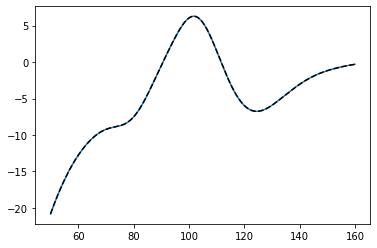

In [16]:
plt.plot(rr1, rr1**2 * xi2)
plt.plot(rr1, rr1**2 * xi2test, 'k--')

(-0.01, 0.01)

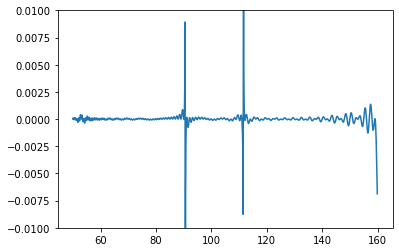

In [18]:
plt.plot(rr1, xi2test/xi2 - 1)
plt.ylim(-0.01,0.01)

In [186]:
p0planck, p2planck = compute_pell_tables(x0s)

(-100.0, 600.0)

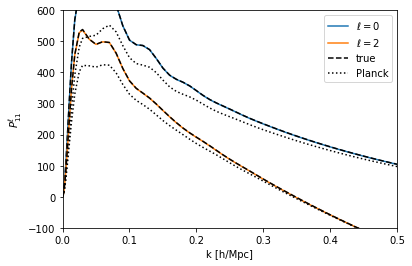

In [146]:
plt.plot(kvec, kvec * p0test[:,0], label=r'$\ell=0$')
plt.plot(kvec, kvec * p0[:,0], 'k--')
plt.plot(kvec, kvec * p0planck[:,0], 'k:')

plt.plot(kvec, kvec * p2test[:,0], label=r'$\ell=2$')
plt.plot(kvec, kvec * p2[:,0], 'k--', label='true')
plt.plot(kvec, kvec * p2planck[:,0], 'k:',label='Planck')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P^\ell_{11}$')
plt.legend()
plt.xlim(0,0.5)
plt.ylim(-100,600)

In [24]:
rr.shape

(1100,)

In [223]:
# Come up with a file format:
import json

list0 = [ dd.tolist() for dd in derivs0 ]
list2 = [ dd.tolist() for dd in derivs2 ]

In [220]:
np.array(list0[3]).shape

(3, 3, 3, 59, 19)

In [225]:
outfile = 'emu/pkells_planck.json'

outdict = {'params': ['omegam', 'h', 'sigma8'],\
           'x0': x0s,\
           'derivs0': list0,\
           'derivs2': list2}

json_file = open(outfile, 'w')
json.dump(outdict, json_file)
json_file.close()

In [228]:
# Let's reproduce things by reloading the saved file
json_file = open(outfile, 'r')
emu = json.load( json_file )
json_file.close()

In [258]:
test_point = [0.28, 0.70, 0.6]

#x0s = emu['x0']
#derivs0 = [np.array(ll) for ll in emu['derivs0']]
#derivs2 = [np.array(ll) for ll in emu['derivs2']]

p0test = taylor_approximate(test_point, x0s, derivs0)
p2test = taylor_approximate(test_point, x0s, derivs2)

Taking the order 4 Taylor series.
Taking the order 4 Taylor series.


In [259]:
p0, p2 = compute_pell_tables(test_point)

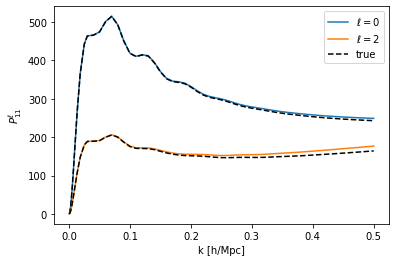

In [260]:
ii = 1

plt.plot(kvec, kvec * p0test[:,ii], label=r'$\ell=0$')
plt.plot(kvec, kvec * p0[:,ii], 'k--')

plt.plot(kvec, kvec * p2test[:,ii], label=r'$\ell=2$')
plt.plot(kvec, kvec * p2[:,ii], 'k--', label='true')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P^\ell_{11}$')
plt.legend()

Text(0, 0.5, '$\\Delta P_\\ell /P_\\ell$')

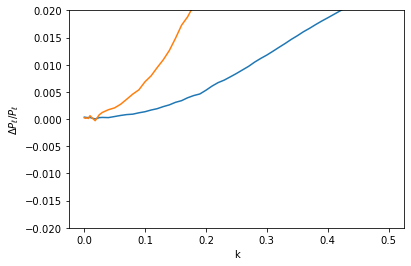

In [261]:
plt.plot(kvec, p0test[:,ii]/p0[:,ii]-1)
plt.plot(kvec, p2test[:,ii]/p2[:,ii]-1)

plt.ylim(-0.02,0.02)
plt.xlabel('k')
plt.ylabel(r'$\Delta P_\ell /P_\ell$')